MIT License

Copyright (c) 2021 Chollette Olisah

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import Dense
from sklearn import metrics
from tensorflow.keras import layers
from keras.utils import np_utils
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
# multi-class classification with Keras
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(tf.__version__)

2.6.0


In [3]:

# Read in data as pandas dataframe and display first 5 rows
data = pd.read_csv('selected_sklearn3.csv')
data.head(5)

,AGE,HbA1c,Chol,TG,VLDL,BMI,Outcome
0,50,4.9,4.2,0.9,0.5,24.0,0
1,26,4.9,3.7,1.4,0.6,23.0,0
2,50,4.9,4.2,0.9,0.5,24.0,0
3,50,4.9,4.2,0.9,0.5,24.0,0
4,33,4.9,4.9,1.0,0.4,21.0,0


In [4]:
#Label Encoding
labels = data['Outcome']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)
 

In [6]:
# Remove the labels from the features
# axis 1 refers to the columns
data= data.drop('Outcome', axis = 1)

# Saving feature names for later use
data_list = list(data.columns)

# Convert to numpy array
data = np.array(data)

In [26]:
# Split the data into training and testing sets
train_features, val_test_features, train_labels, val_test_labels = train_test_split(data, dummy_y, shuffle=True, test_size = 0.3,
                                                                           random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(val_test_features, val_test_labels, shuffle=True, test_size=0.5)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Label Shape:', Y_val.shape)

Training Features Shape: (700, 6)
Training Labels Shape: (700, 3)
Testing Features Shape: (150, 6)
Testing Labels Shape: (150, 3)
Validation Features Shape: (150, 6)
Validation Label Shape: (150, 3)


In [27]:
# normalize train set using the keras nomalizer 
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

[[53.372852   8.311571   4.8518853  2.3518286  1.8732857 29.588064 ]]
First example: [[60.   7.6  3.3  1.7  0.8 36.6]]

Normalized: [[ 0.76 -0.28 -1.17 -0.47 -0.29  1.4 ]]


main model designed

In [30]:
def create_model(data):
  model = keras.Sequential([
      data,
      layers.Dense(12, activation='relu'),
      layers.Dense(12, activation='relu'),
      layers.Dense(24, activation='relu'),
      layers.Dense(24, activation='relu'),
      layers.Dense(3, activation="softmax")
  ])
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  return model

In [31]:
model1 = create_model(normalizer)

In [32]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 6)                 13        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_6 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 75        
Total params: 1,240
Trainable params: 1,227
Non-trainable params: 13
___________________________________________________

In [33]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history=model1.fit(
    train_features, train_labels,
     validation_data=(X_val, Y_val),
    verbose=1, batch_size =5,epochs=200,callbacks=[tensorboard_callback])


Epoch 1/200
140/140 [==============================] - 1s 4ms/step - loss: 0.5001 - accuracy: 0.8414 - val_loss: 0.2598 - val_accuracy: 0.8533
Epoch 2/200
140/140 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8757 - val_loss: 0.2150 - val_accuracy: 0.9200
Epoch 3/200
140/140 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.8786 - val_loss: 0.1891 - val_accuracy: 0.9267
Epoch 4/200
140/140 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.8886 - val_loss: 0.1910 - val_accuracy: 0.9200
Epoch 5/200
140/140 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.8957 - val_loss: 0.1971 - val_accuracy: 0.9133
Epoch 6/200
140/140 [==============================] - 0s 1ms/step - loss: 0.2192 - accuracy: 0.9014 - val_loss: 0.1589 - val_accuracy: 0.9400
Epoch 7/200
140/140 [==============================] - 0s 1ms/step - loss: 0.2122 - accuracy: 0.9000 - val_loss: 0.1613 - val_accuracy: 0.9400

Epoch 58/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9829 - val_loss: 0.0461 - val_accuracy: 0.9867
Epoch 59/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9814 - val_loss: 0.0542 - val_accuracy: 0.9800
Epoch 60/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9800 - val_loss: 0.0497 - val_accuracy: 0.9867
Epoch 61/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9829 - val_loss: 0.0441 - val_accuracy: 0.9867
Epoch 62/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9814 - val_loss: 0.0452 - val_accuracy: 0.9867
Epoch 63/200
140/140 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9814 - val_loss: 0.0452 - val_accuracy: 0.9800
Epoch 64/200
140/140 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9829 - val_loss: 0.0526 - val_accuracy:

Epoch 115/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9871 - val_loss: 0.0419 - val_accuracy: 0.9867
Epoch 116/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9871 - val_loss: 0.0398 - val_accuracy: 0.9800
Epoch 117/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9871 - val_loss: 0.0387 - val_accuracy: 0.9867
Epoch 118/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9871 - val_loss: 0.0525 - val_accuracy: 0.9867
Epoch 119/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.9900 - val_loss: 0.0458 - val_accuracy: 0.9867
Epoch 120/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0391 - val_accuracy: 0.9933
Epoch 121/200
140/140 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9900 - val_loss: 0.0479 - val_ac

In [34]:
#Save model weights
model1.save('DLmodelm.tf')
model_loaded = tf.keras.models.load_model('DLmodelm.tf')


INFO:tensorflow:Assets written to: DLmodelm.tf\assets


In [36]:
# plot network loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='Train_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Diabetes]')
  plt.legend()
  plt.grid(True)



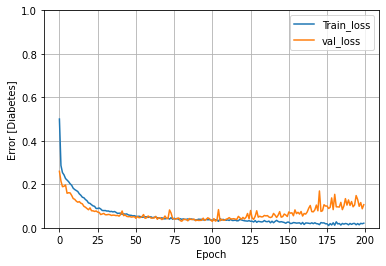

In [37]:
plot_loss(history)

In [38]:
# plot network accuracy
def plot_loss(history):
  plt.plot(history.history['accuracy'], label='Train_accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy [Diabetes]')
  plt.legend()
  plt.grid(True)


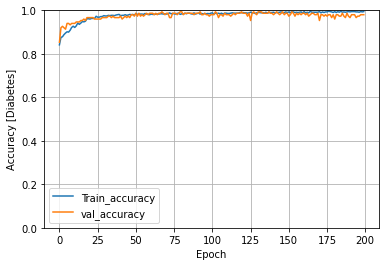

In [39]:
plot_loss(history)

In [40]:
# Predict on the test data
predictions = model1.predict(X_test)

# Calculate mean absolute errors
score = model1.evaluate(X_test, Y_test,verbose=1)

5/5 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9733


In [41]:
# Compare Prediction 
print("Train acc: " , model1.evaluate(train_features, train_labels))
print("Test acc: ", model1.evaluate(X_test, Y_test))

22/22 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.9957
Train acc:  [0.007880113087594509, 0.9957143068313599]
5/5 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9733
Test acc:  [0.13780568540096283, 0.9733333587646484]


In [40]:

# Prediction
y_pred = np.around(model1.predict(X_test))
print(metrics.classification_report(Y_test,y_pred, digits=8))

              precision    recall  f1-score   support

           0  0.94736842 0.85714286 0.90000000        21
           1  0.60000000 0.75000000 0.66666667         4
           2  0.97619048 0.98400000 0.98007968       125

   micro avg  0.96000000 0.96000000 0.96000000       150
   macro avg  0.84118630 0.86371429 0.84891545       150
weighted avg  0.96212364 0.96000000 0.96051085       150
 samples avg  0.96000000 0.96000000 0.96000000       150



In [58]:
new_df = pd.DataFrame([[100,300,75,64]])
# We predict insulin
prediction = model1.predict(new_df)
prediction

array([[0.00131434, 0.9787217 , 0.01996393]], dtype=float32)

In [ ]:
#Calculate metrics
y_true = Y
y_prediction = p
cnf_matrix = l #confusion_matrix(y_true, y_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [287]:
#Plot Confusion metric
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 9472), started 1 day, 2:14:26 ago. (Use '!kill 9472' to kill it.)

In [60]:
!tensorboard dev upload \
  --logdir logs \
  --name "Sample op-level graph" \
  --one_shot

^C
